In [4]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 200

Index(['Date', 'MSFT', 'MU', 'INTC', 'XOM', 'GE', 'CVX', 'C', 'BAC', 'JPM',
       'DIS'],
      dtype='object')
Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.549 Seconds
Building M ...
	Done. Took 1.205 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 184.924
	Done. Took 92.073 Seconds
Extracting Qis ...
	Done. Took 0.003 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) XOM <-- CVX: 6.458*(-0.287)^t + -5.974*(-0.081)^t + -8.866*(-0.380)^t + 1.868*(-0.623)^t + 6.514483 * delta(t,0)
		RMSE = 0.042
		Matlab: [ 6.46 -0.29 -5.97 -0.08 -8.87 -0.38  1.87 -0.62]
	Done. Took 17.375 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) XOM <-- C: -5.356*(0.033)^t + 9.437*(-0.321)^t + 1.908*(-0.253)^t + -4.979*(-0.475)^t + -1.011190 * delta(t,0)
		RMSE = 0.181
		Matlab: [-5.36  0.03  9.44 -0.32  1.91 -0.25 -4.98 -0.48]
	Done. Took 6.612 Seconds
Learning Convolution for Q(1,4)

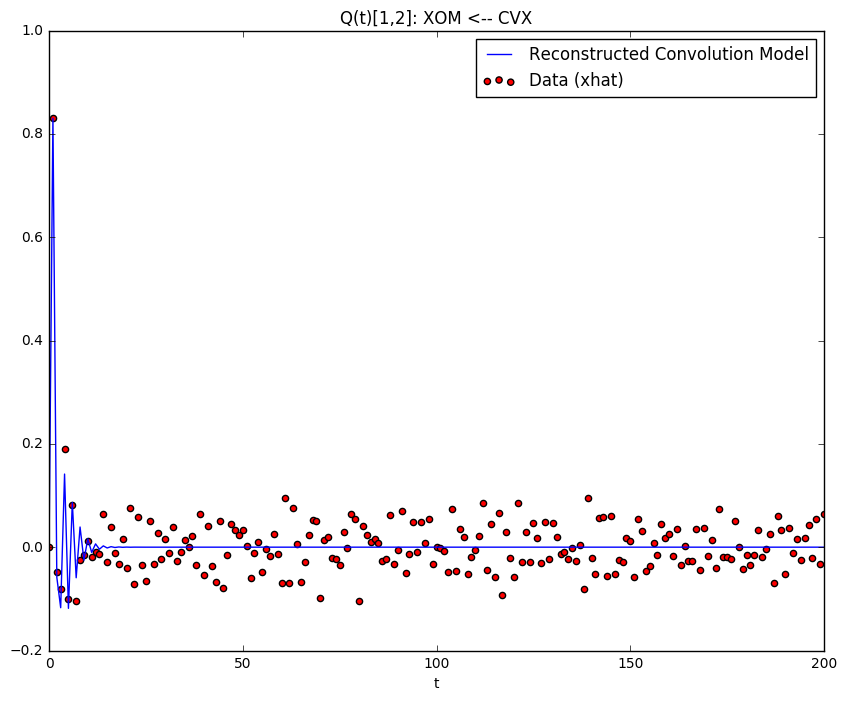

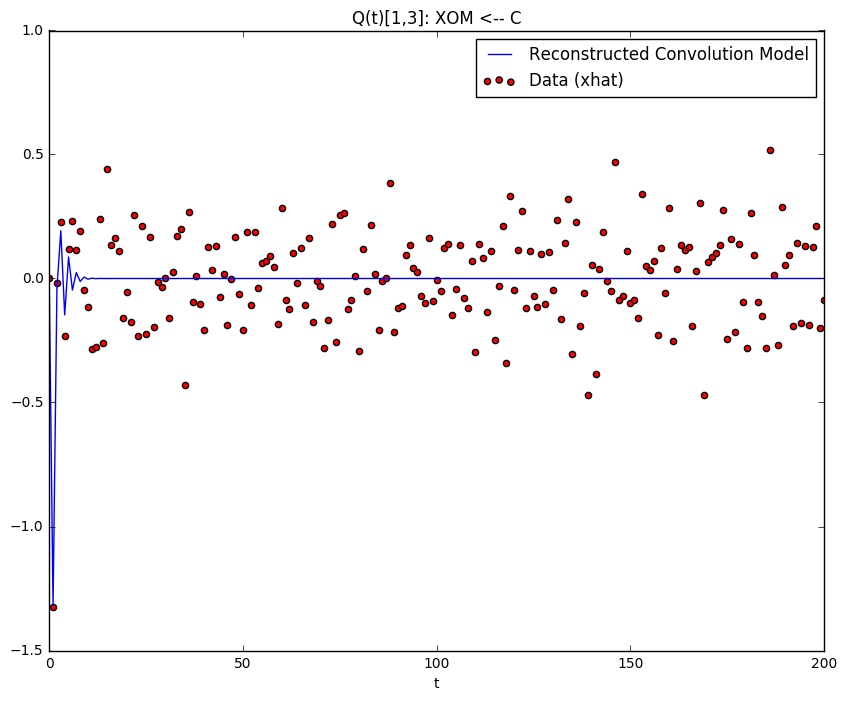

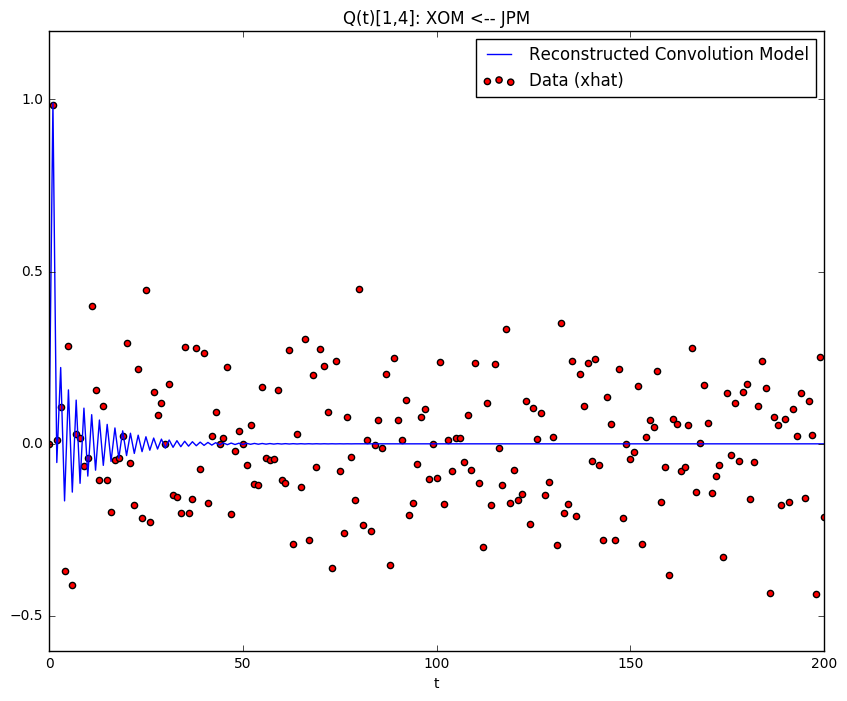

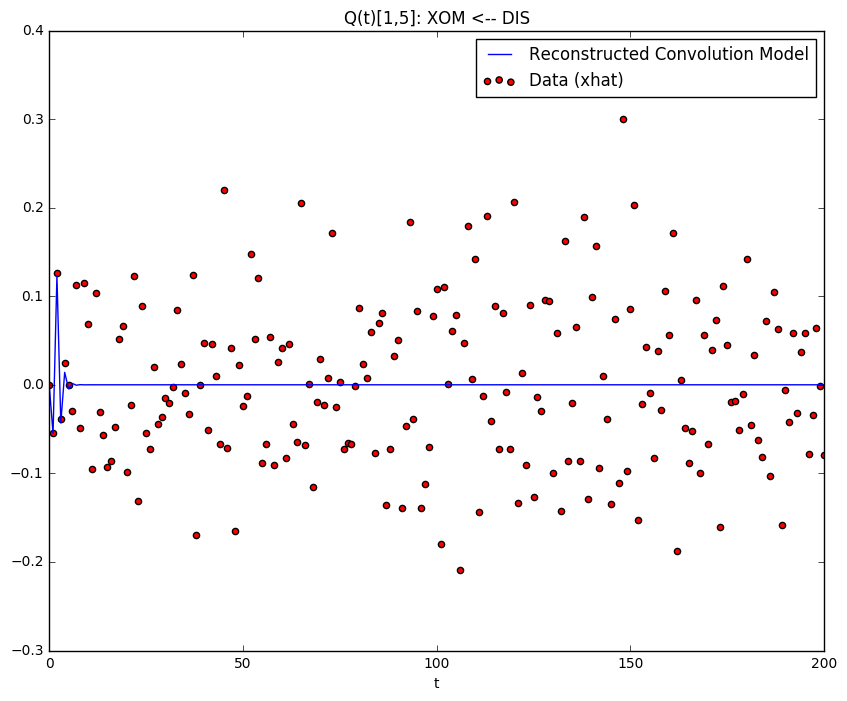

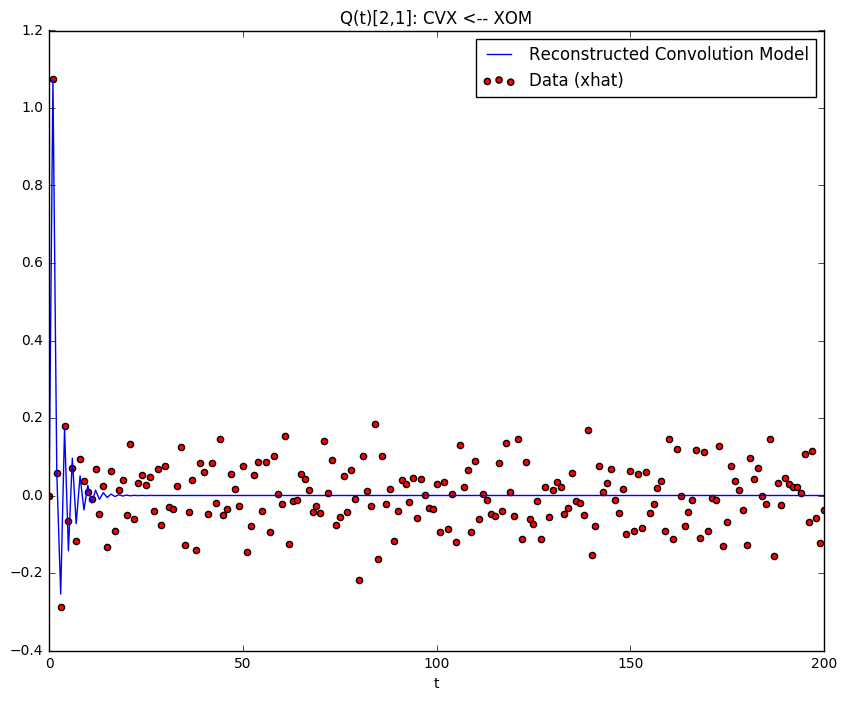

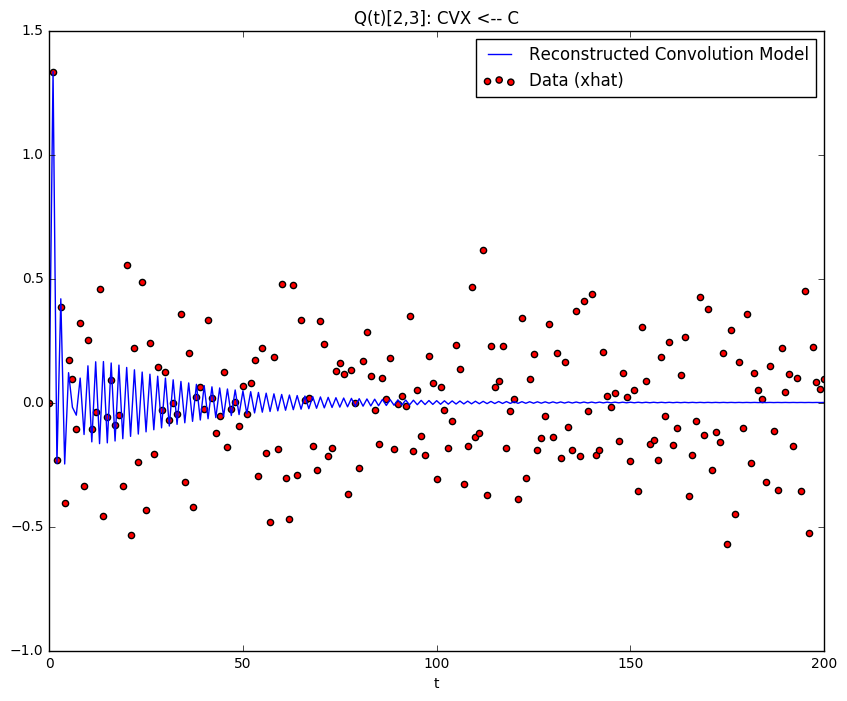

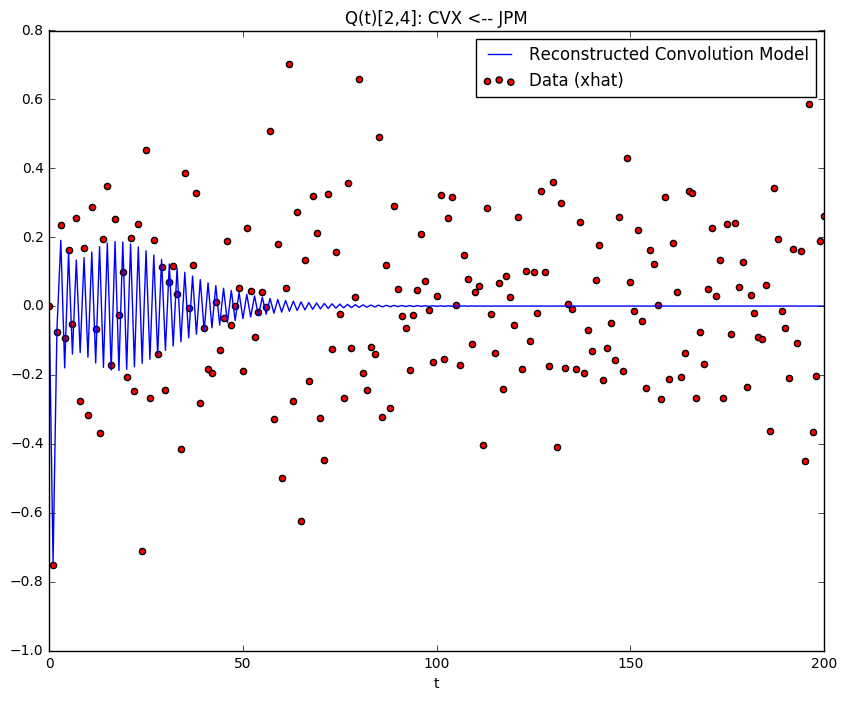

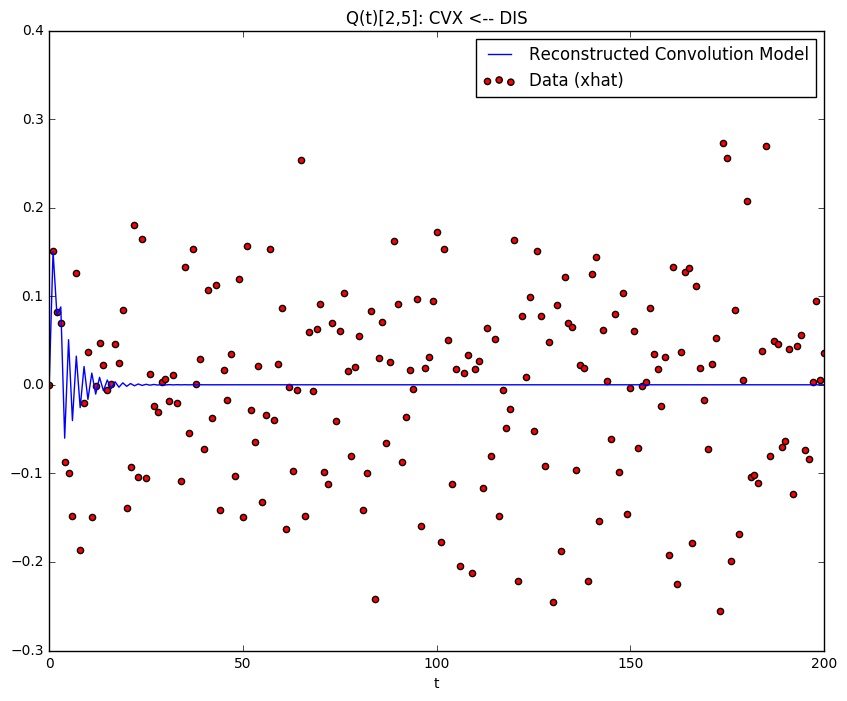

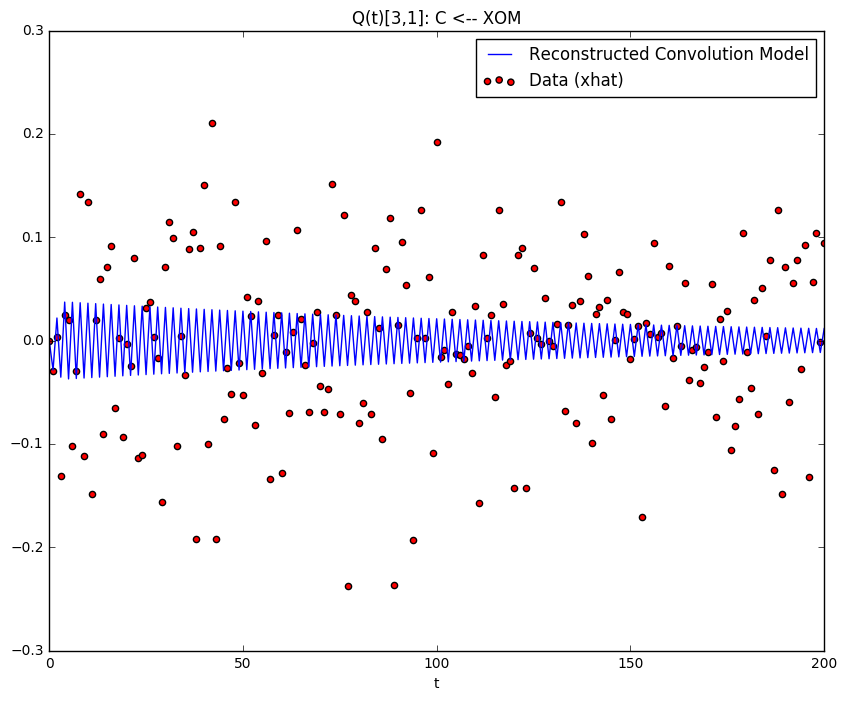

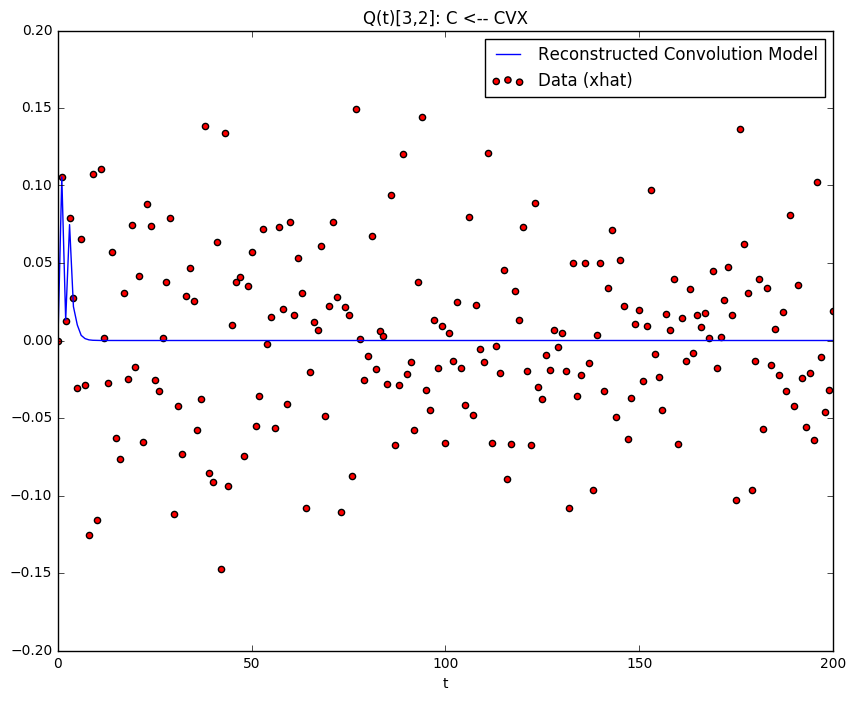

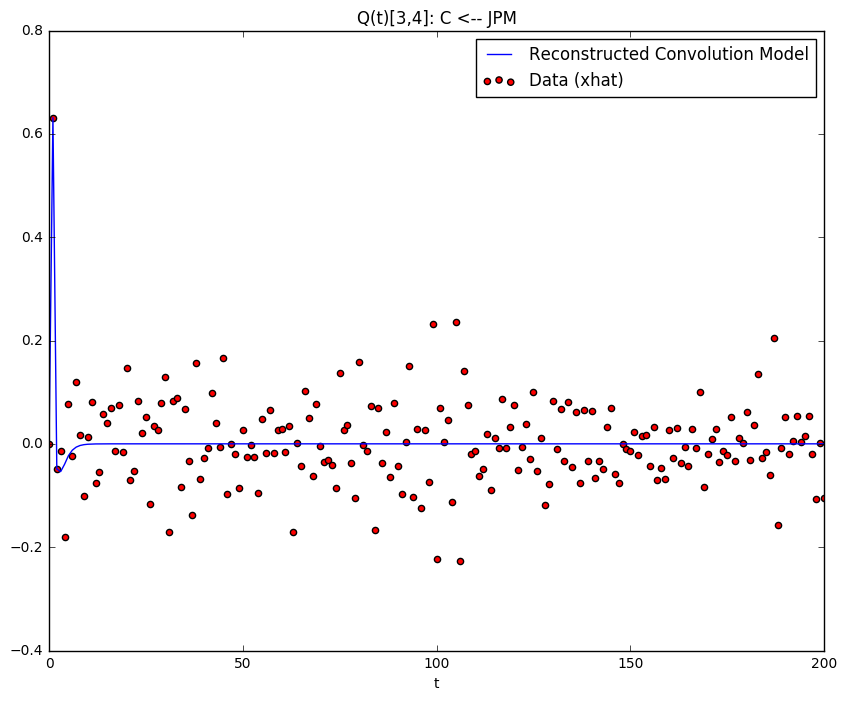

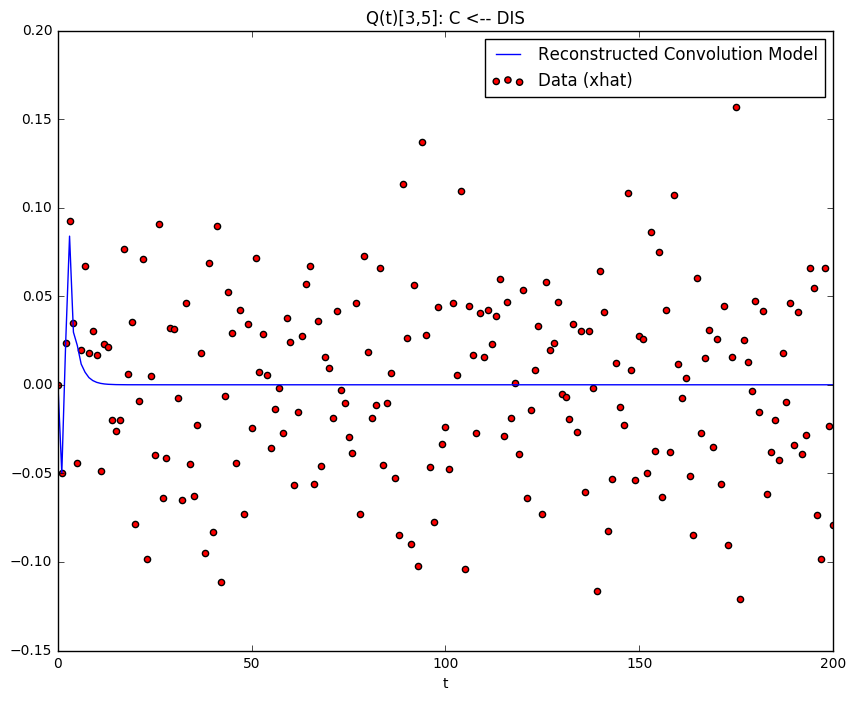

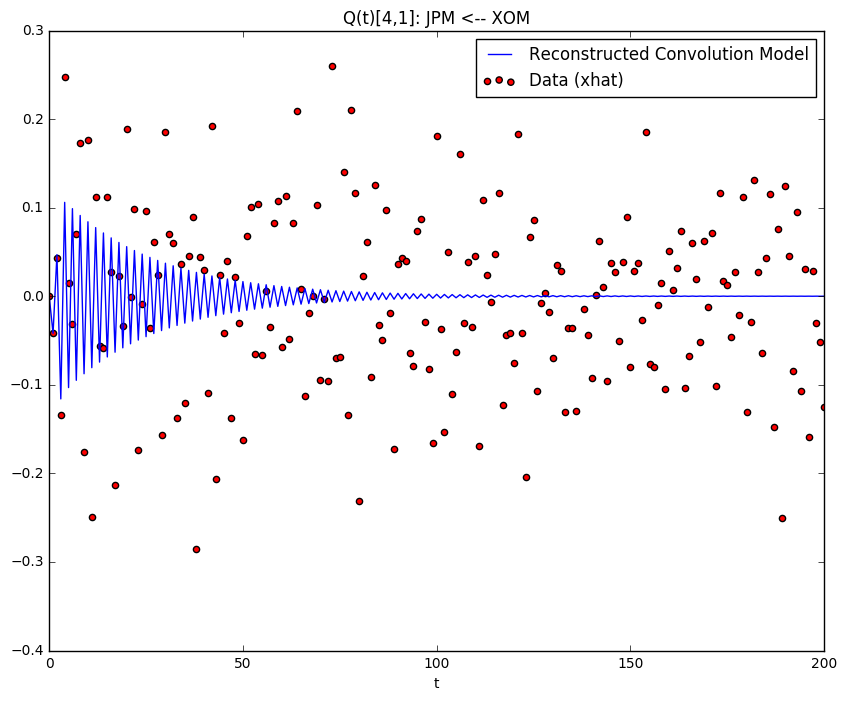

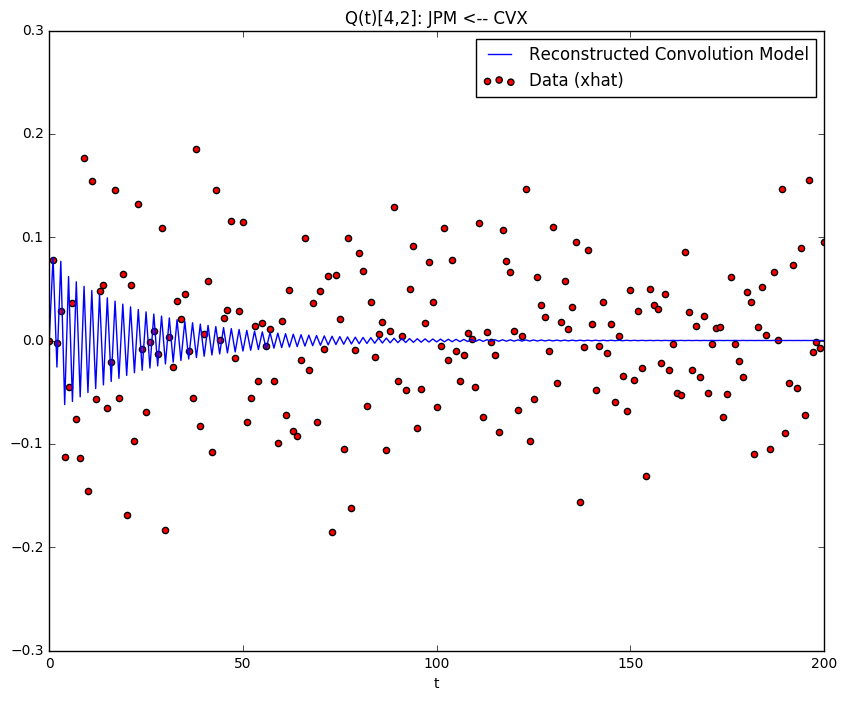

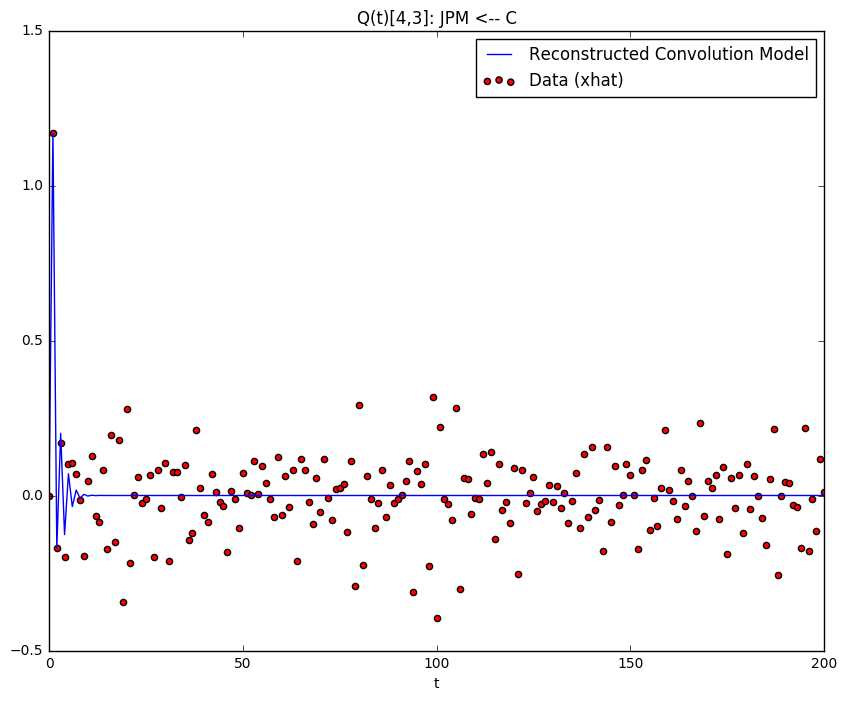

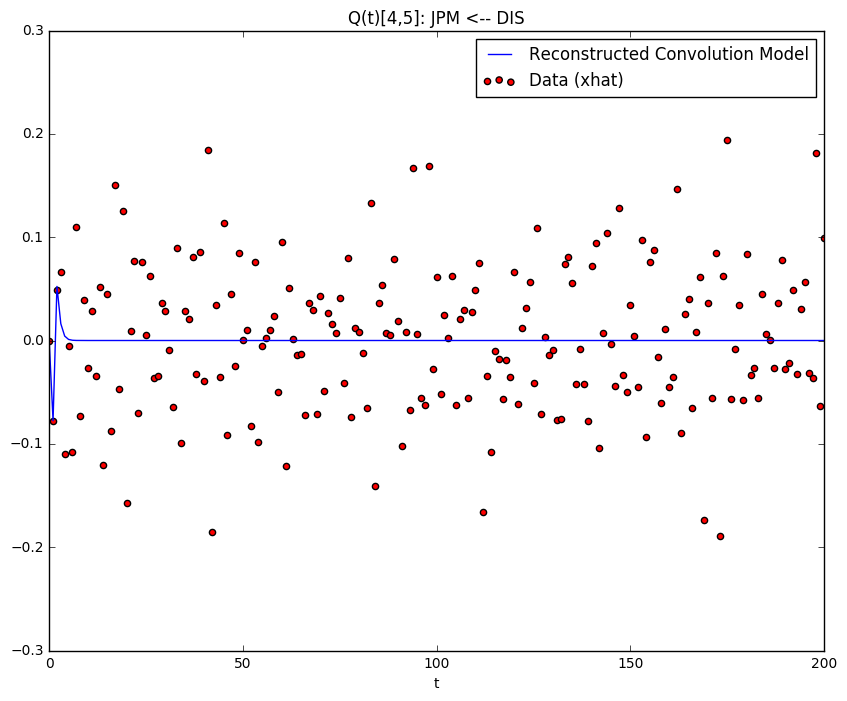

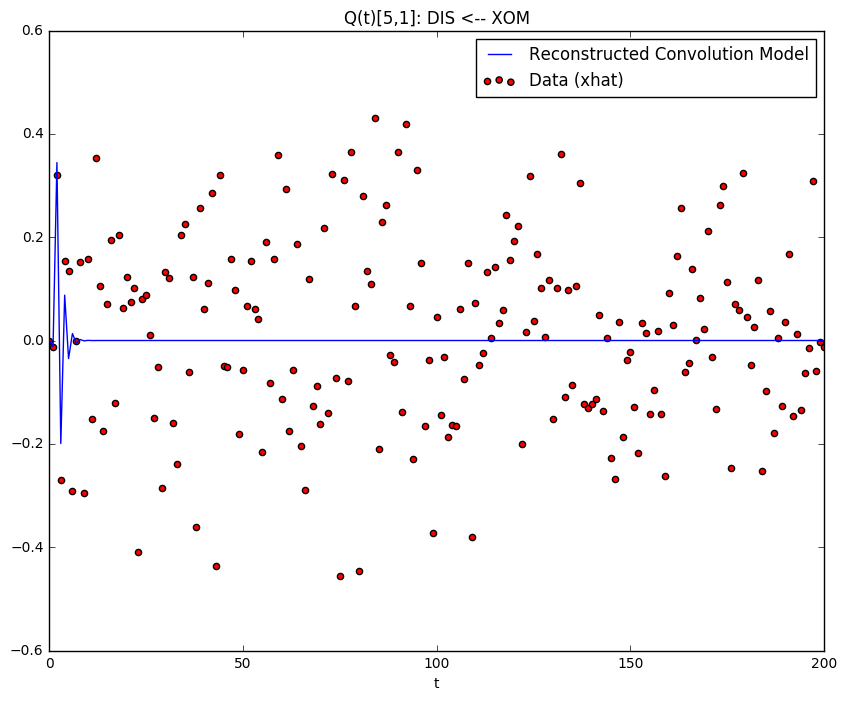

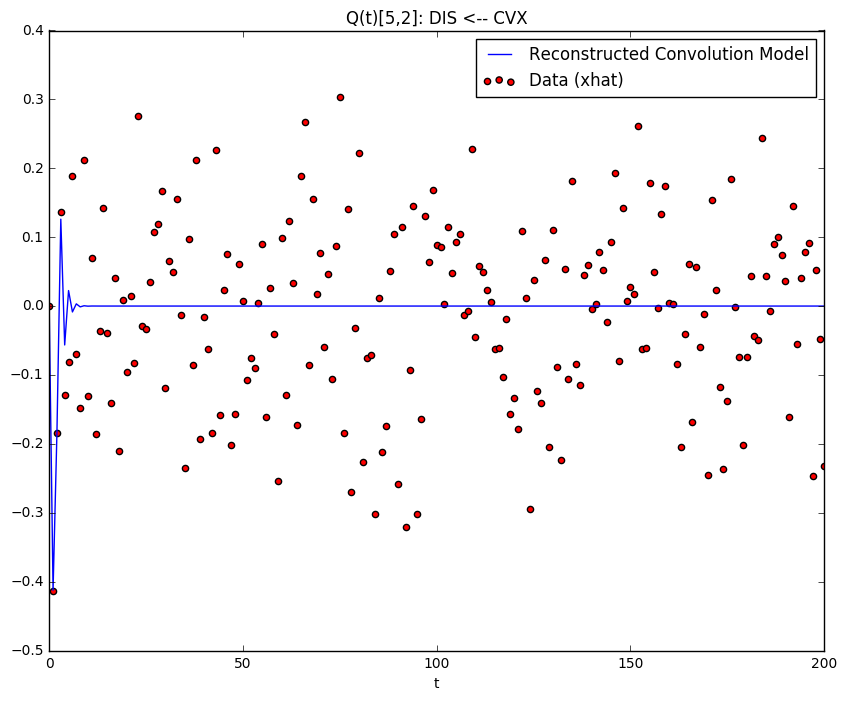

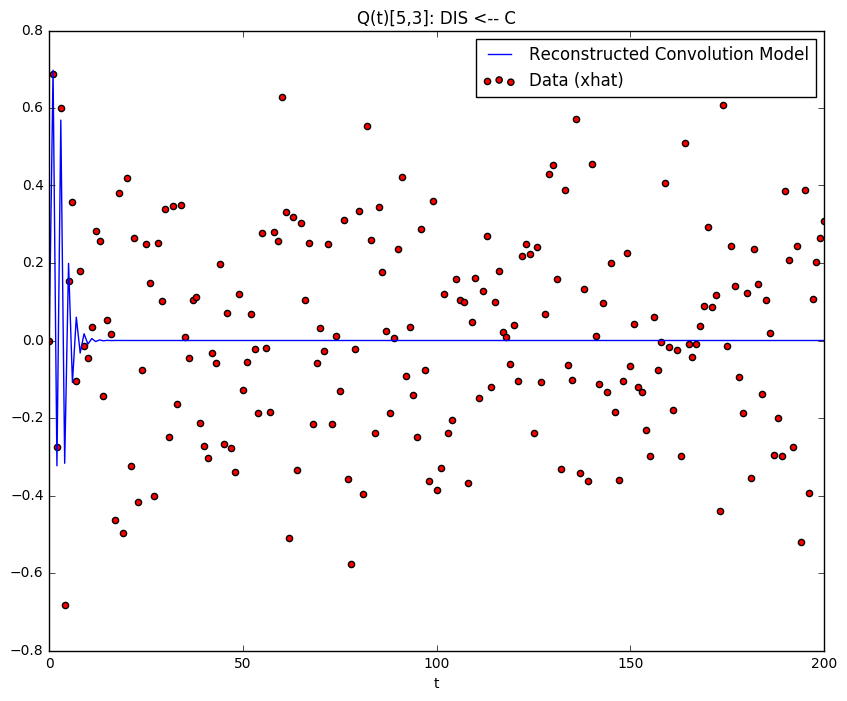

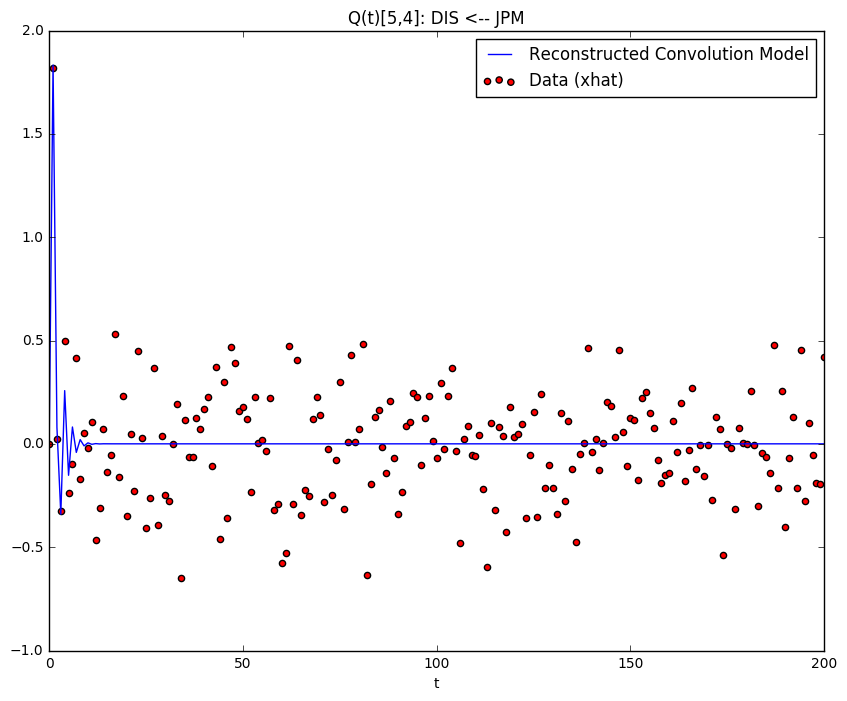

In [5]:
%matplotlib inline
y = pd.read_csv('short.csv')
y = y.sort_values(by='Date')
y = y.tail(R * 6 + 1)
print(y.columns)
cols = [col for col in y.columns if col != 'Date']
cols = ['XOM', 'CVX', 'C', 'JPM', 'DIS']
y = y[cols].values
securities = cols

titles = {i + 1: sec for i, sec in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=False)
rs = recon.unmeasured(y, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [6]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([6.45787592004 -0.28735446447 -5.9738972667 -0.0810000436584 -8.86605319541 -0.379635446392 1.86759134583 -0.623290743422 ; -5.35564030927 0.032975551503 9.43729391492 -0.320541709356 1.90805191005 -0.253278729951 -4.97851516104 -0.475290689555 ; -0.257657735728 -0.903748450869 -0.766850193234 0.0602325003215 0.700566992252 0.19828057279 3.35251097219 0.197999211736 ; 1.28956394953 -0.323159324948 -4.87758943946 -0.0315227858651 -1.18511805813 -0.0301673407158 -5.1329785371 -0.033534280804 ; 0.714153917575 -0.719519388552 -0.260656498027 0.467595019804 -9.05619077315 -0.149794371284 -2.35447023792 -0.149417357104 ; 9.73846485746 0.138503755998 -2.52698979929 -0.686547655414 4.44682349103 -0.328561708713 0.29924538561 -0.963643238422 ; 5.45372743368 -0.230702490959 -2.10270570165 -0.770072811033 -2.47445233152 -0.922714376657 3.83593131342 -0.883596257192 ; 4.82352593282 0.148830511767 7.24466015561 -0.102727123762 -0.564284015235 -0.0929484284323 -0.155485247412 -0.7990

In [7]:
y = pd.read_csv('short.csv')
y = y.sort_values(by='Date')
y = y.tail(R * 6 + 1)

print(y['Date'].min())
print(y['Date'].max())

2012-01-06
2016-10-13


Index(['Date', 'MSFT', 'MU', 'INTC', 'XOM', 'GE', 'CVX', 'C', 'BAC', 'JPM',
       'DIS'],
      dtype='object')
Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.543 Seconds
Building M ...
	Done. Took 1.410 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished in 500 iterations
	Done. Took 4.596 Seconds
Extracting Qis ...
	Done. Took 0.007 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) XOM <-- CVX: 2.176*(-0.068)^t + -0.531*(0.181)^t + -5.825*(-0.068)^t + 5.656*(0.078)^t + -1.477269 * delta(t,0)
		RMSE = 0.004
		Matlab: [ 2.18 -0.07 -0.53  0.18 -5.82 -0.07  5.66  0.08]
	Done. Took 30.582 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) XOM <-- C: 0.786*(0.025)^t + 1.099*(0.043)^t + 0.094*(0.013)^t + -1.698*(0.040)^t + -0.280303 * delta(t,0)
		RMSE = 0.007
		Matlab: [ 0.79  0.03  1.1   0.04  0.09  0.01 -1.7   0.04]
	Done. Took 7.476 Seconds
Learning Convolution for Q(1,4) ...
	Q(1

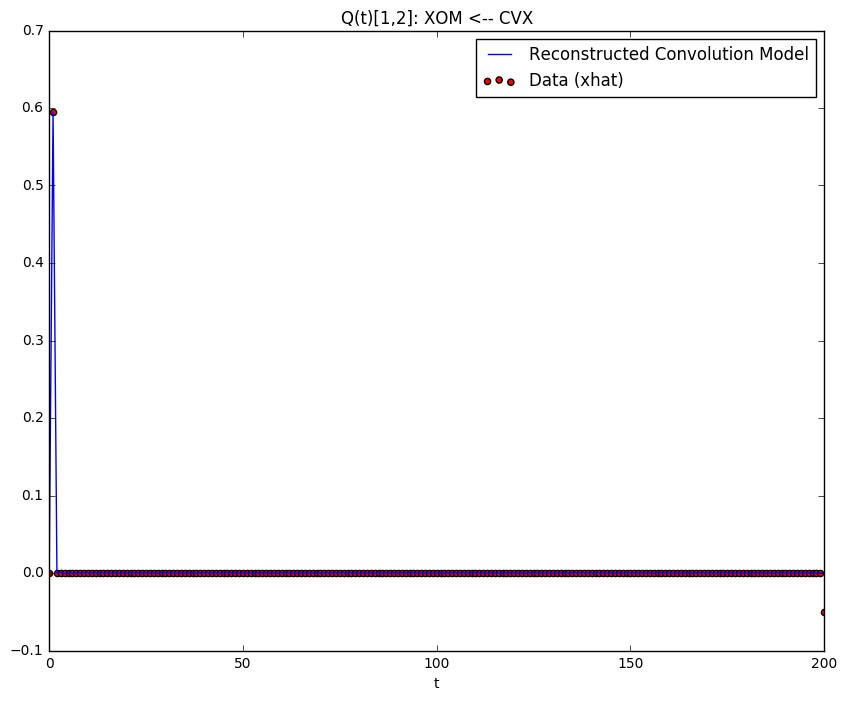

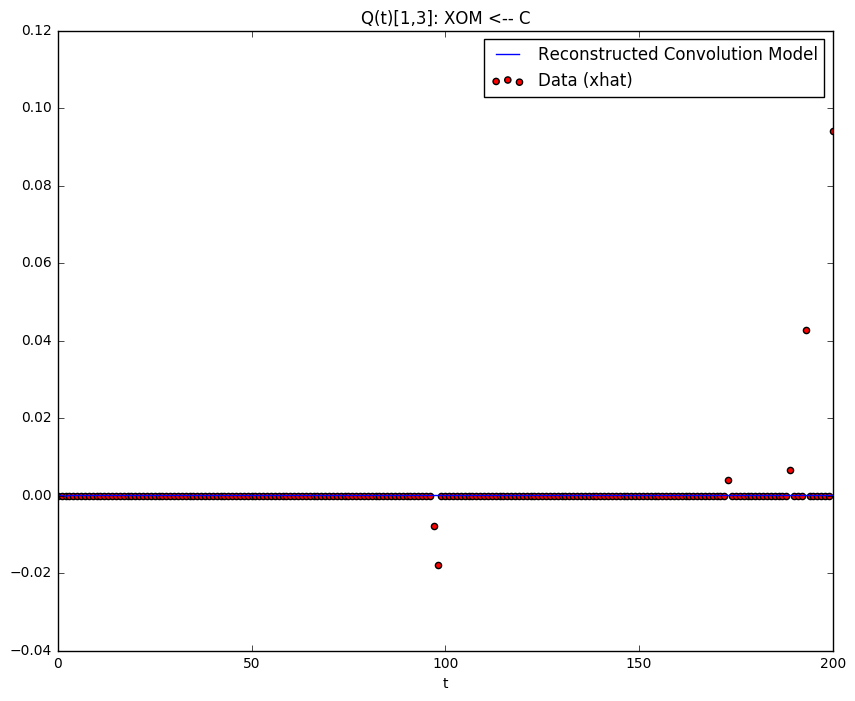

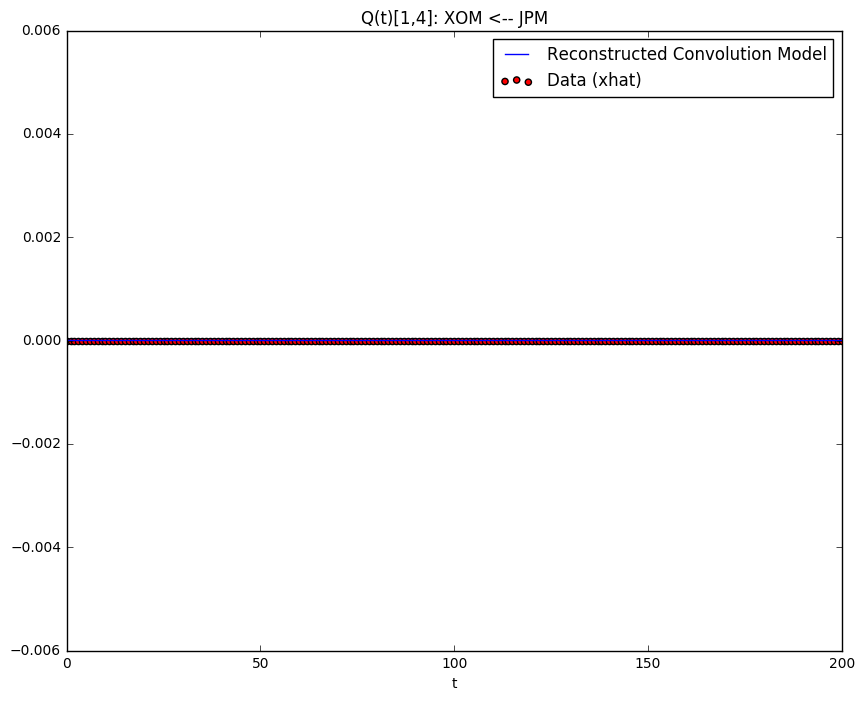

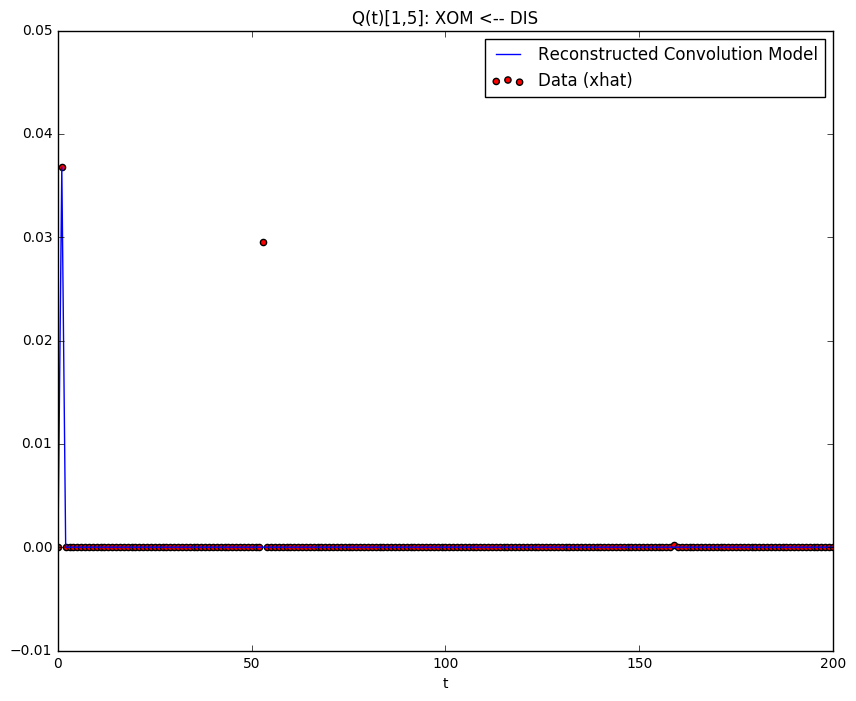

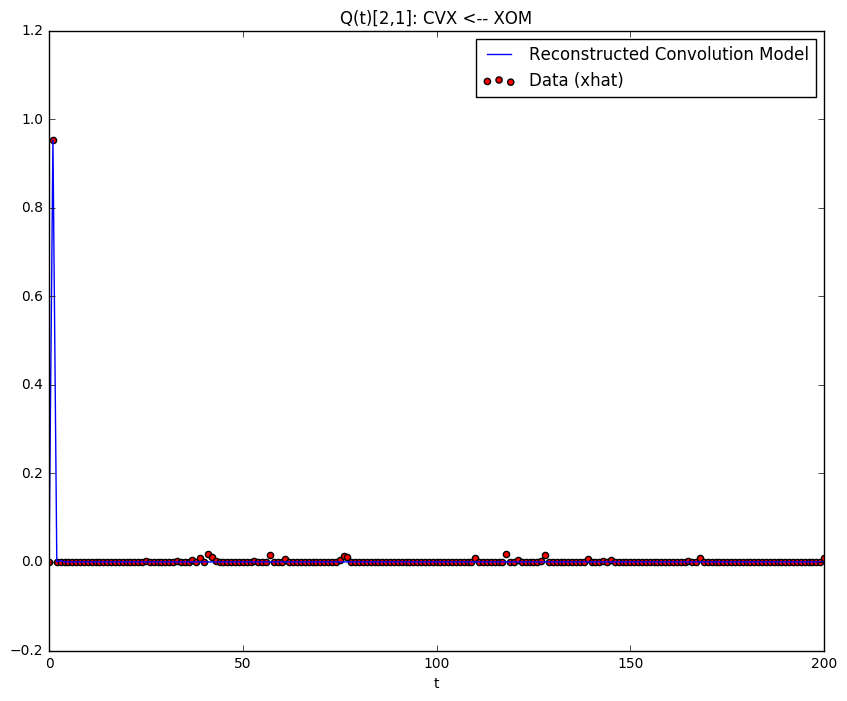

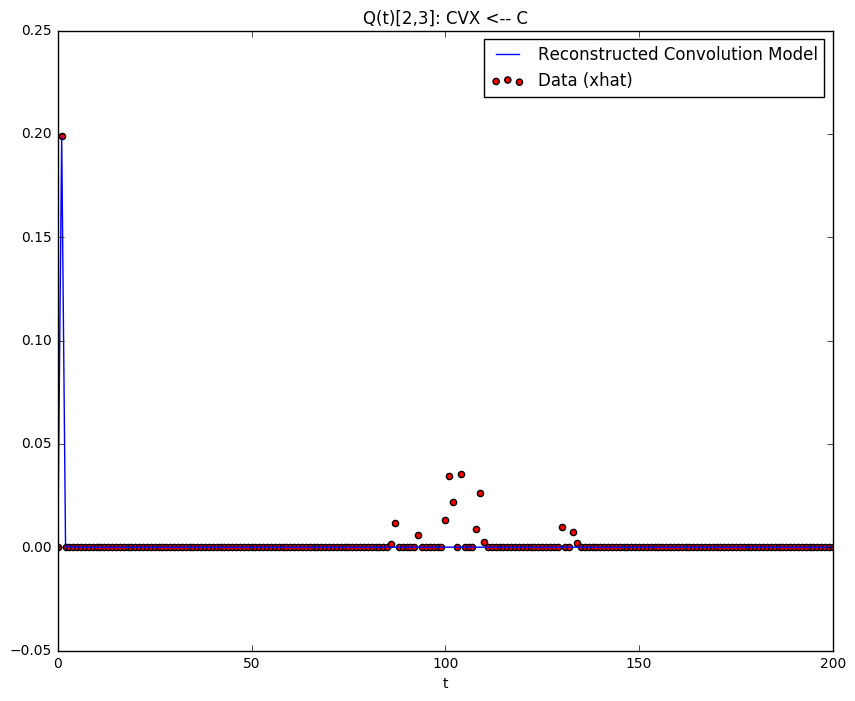

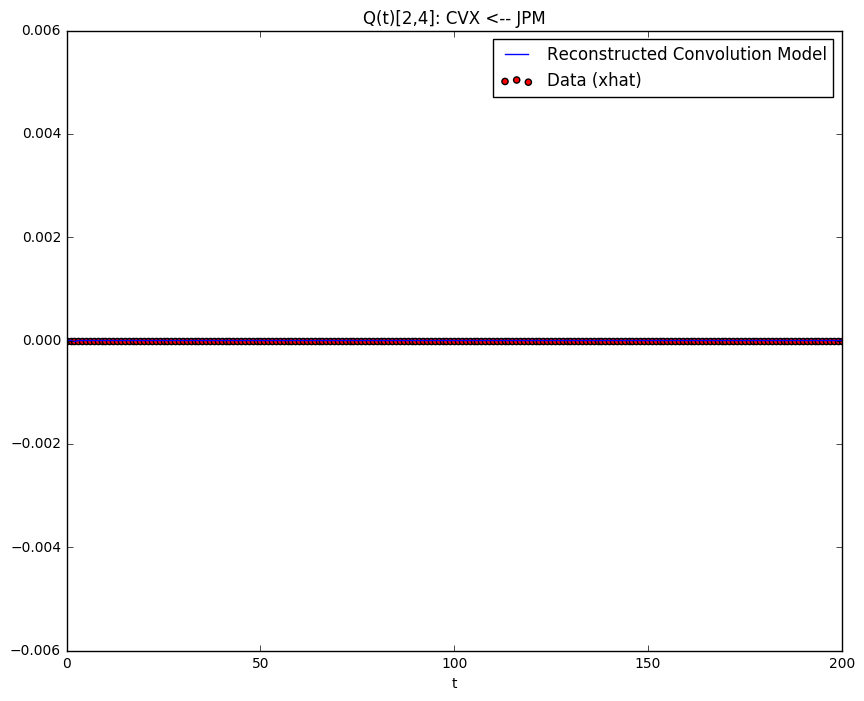

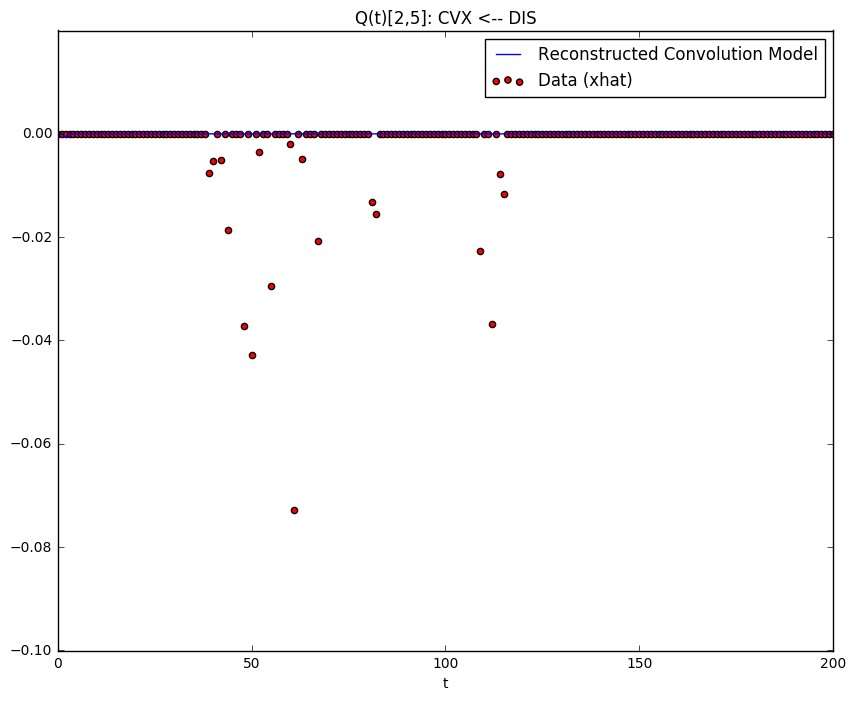

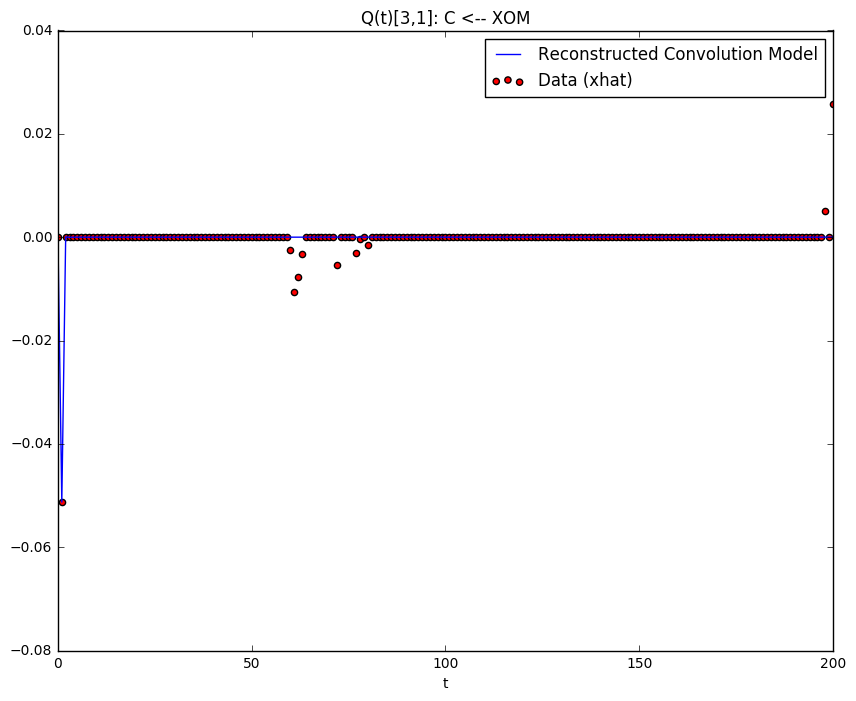

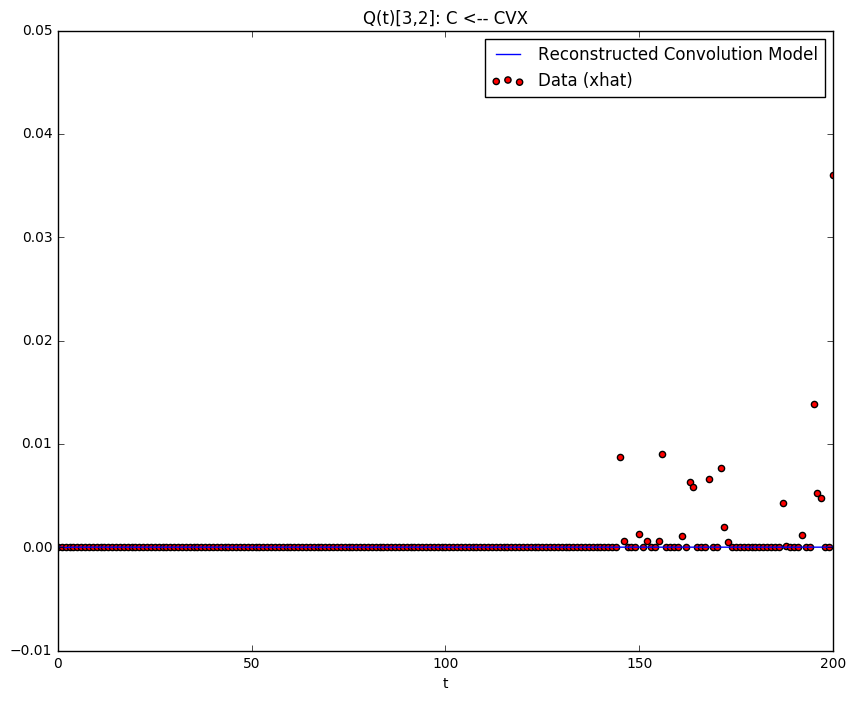

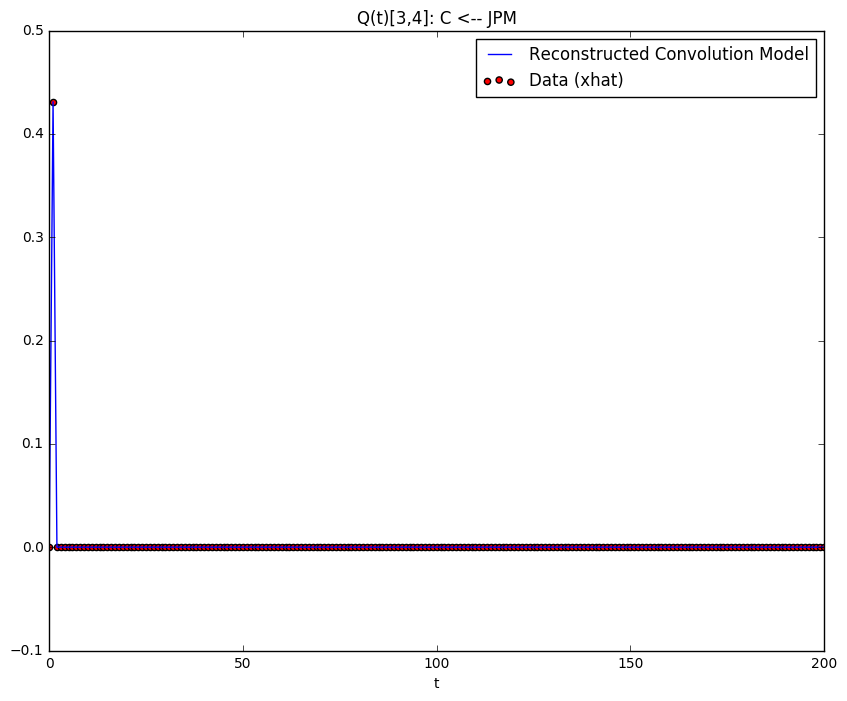

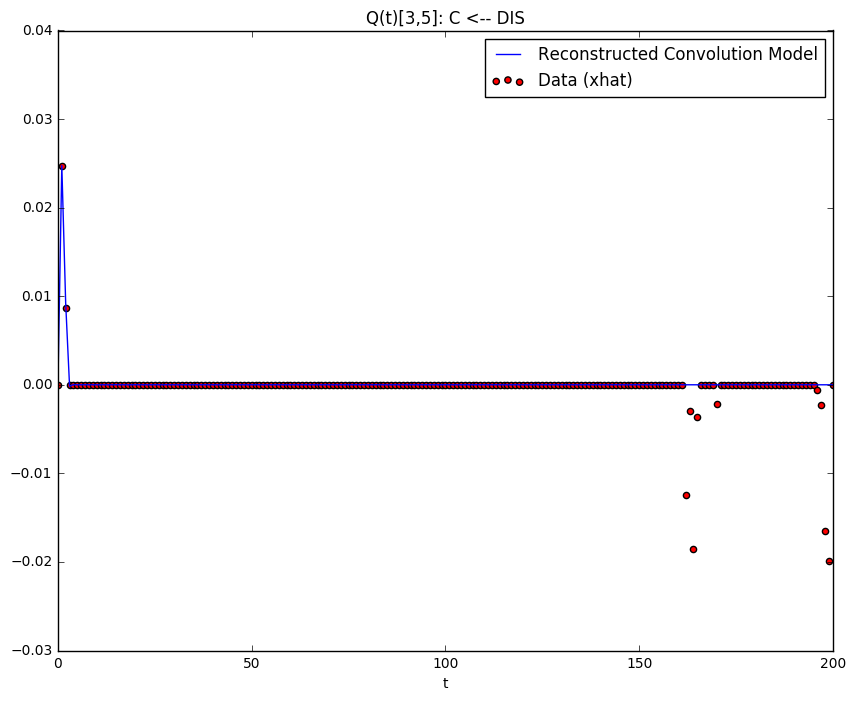

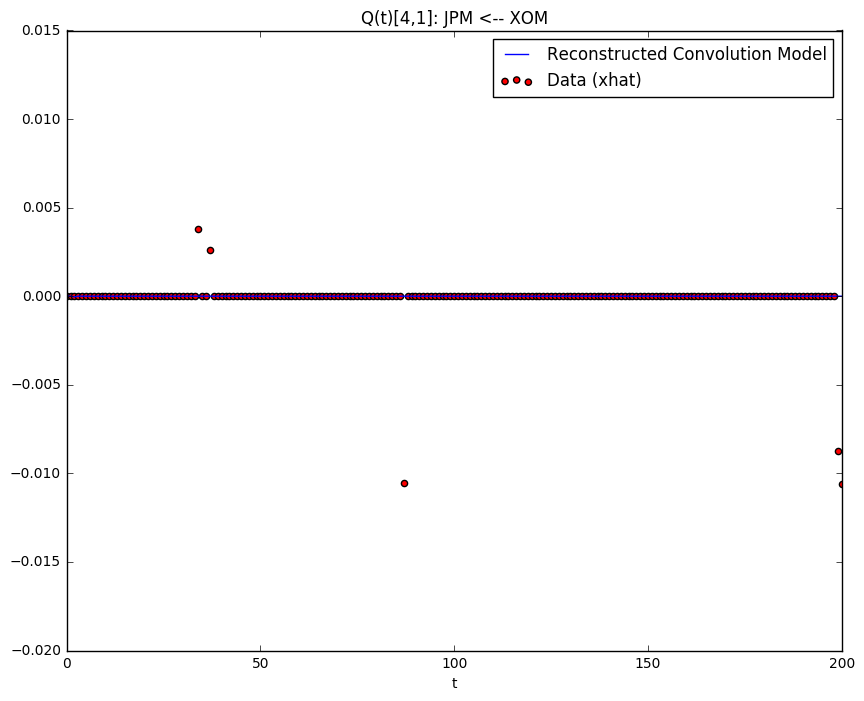

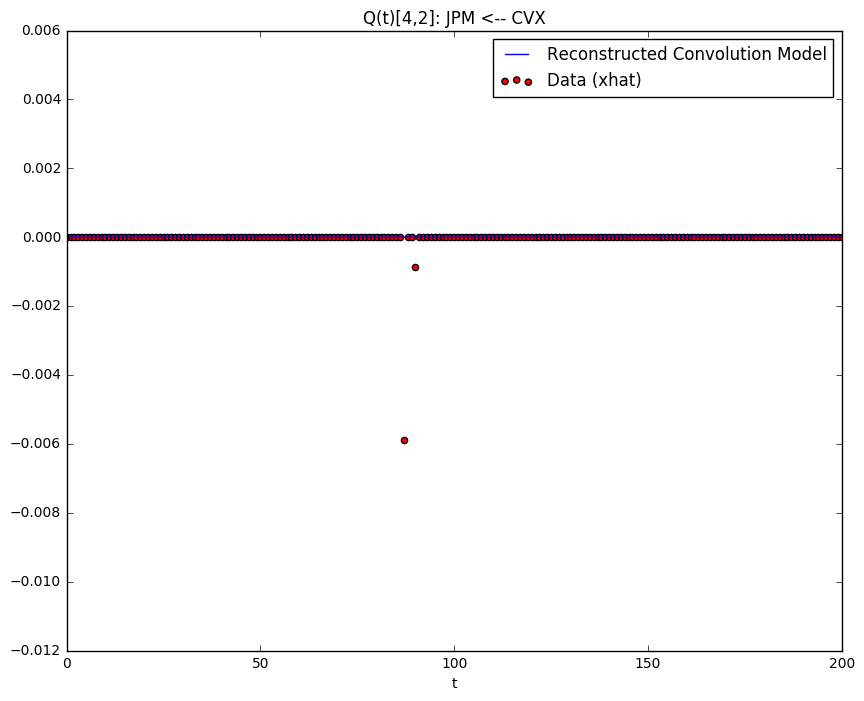

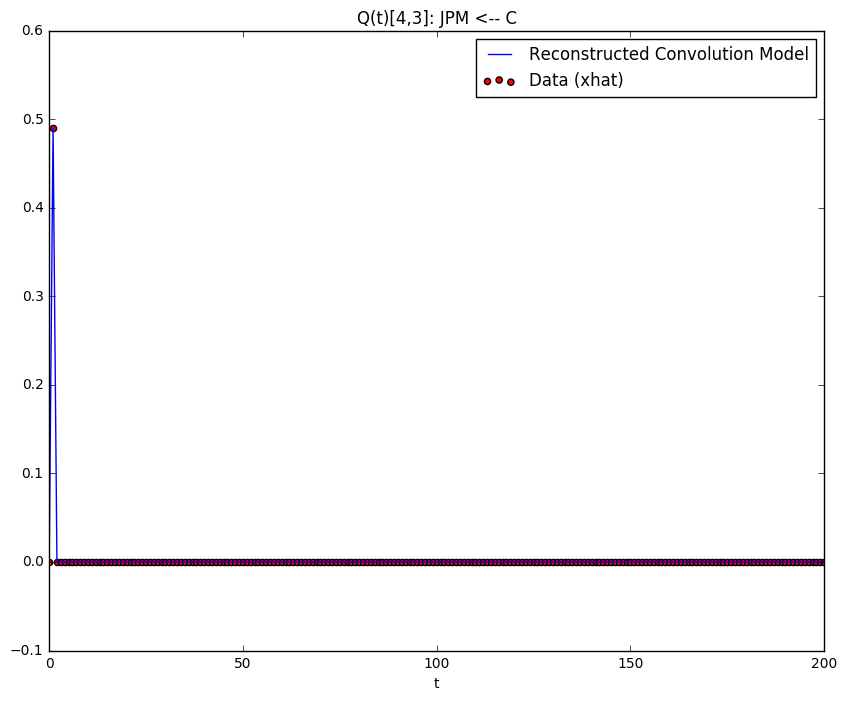

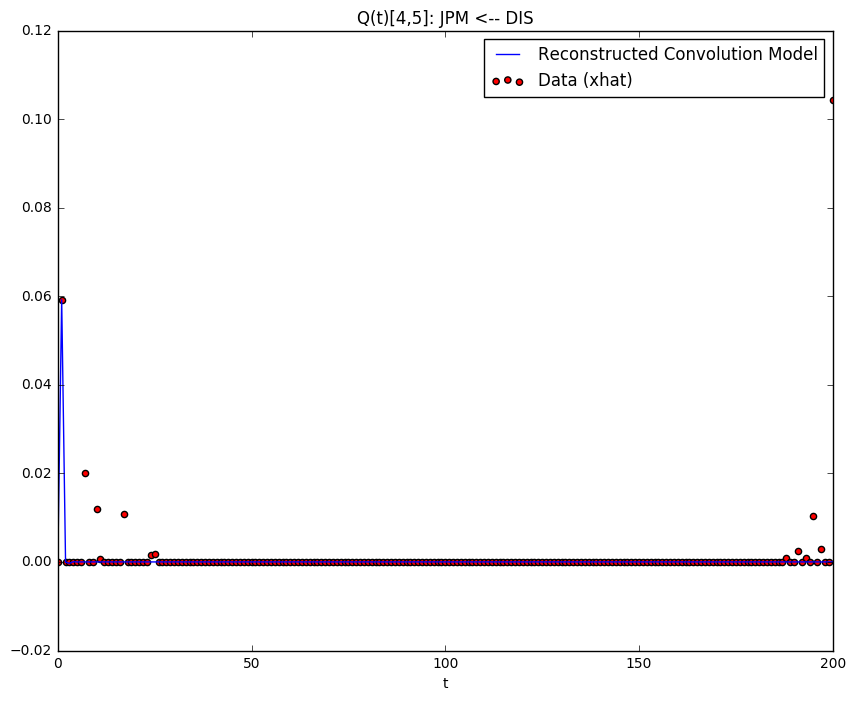

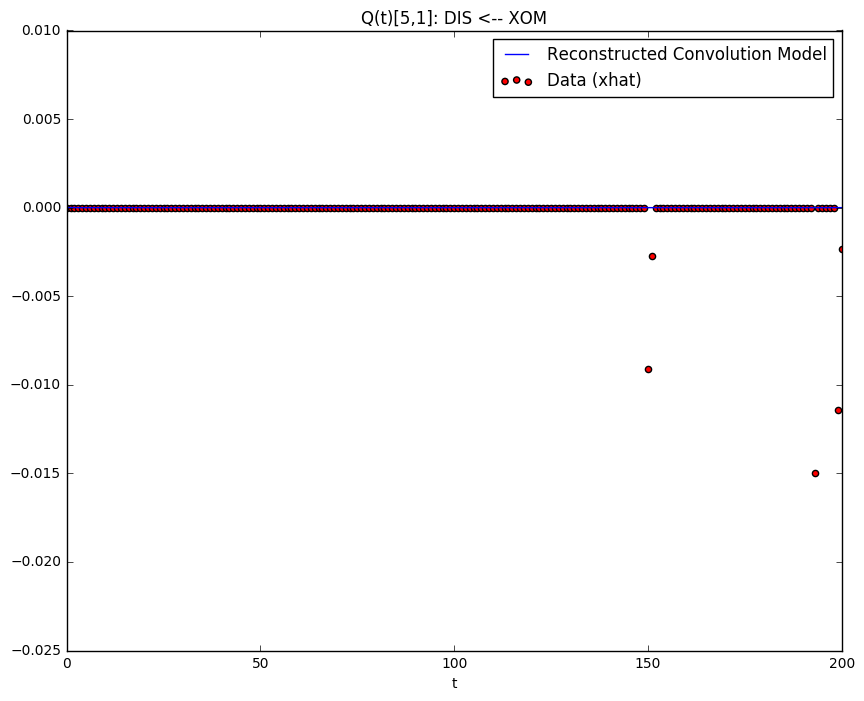

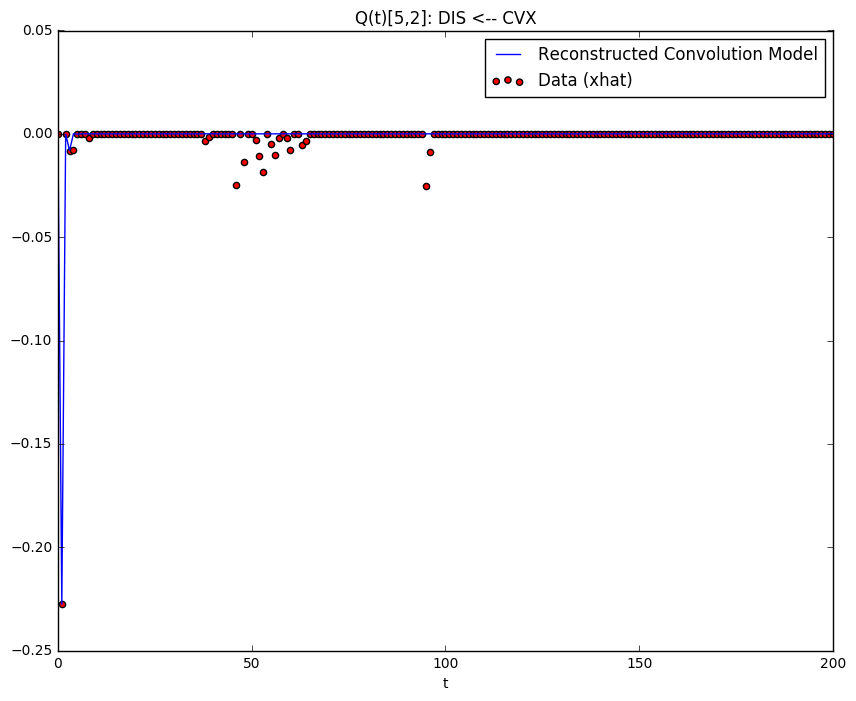

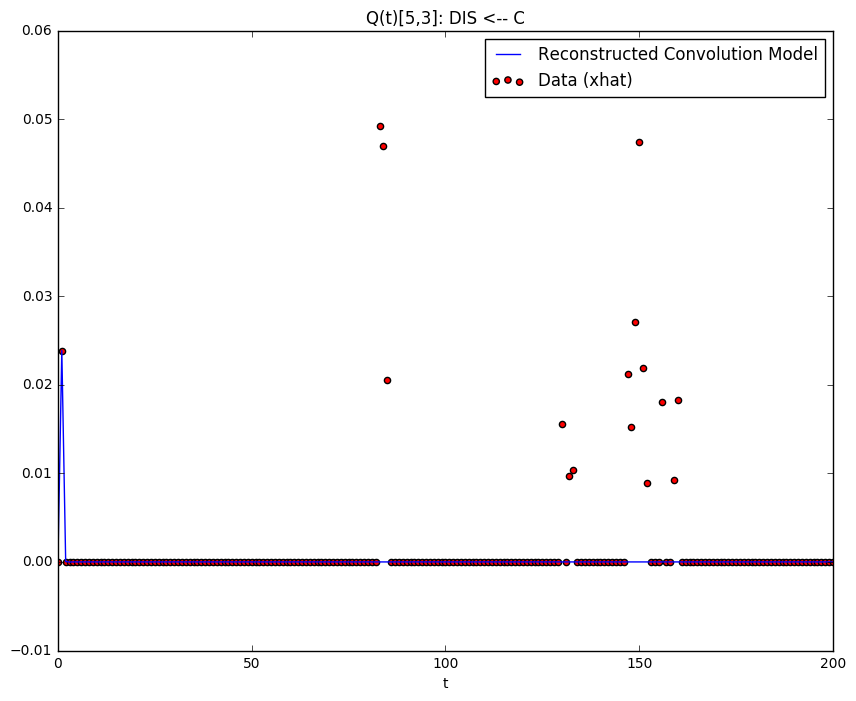

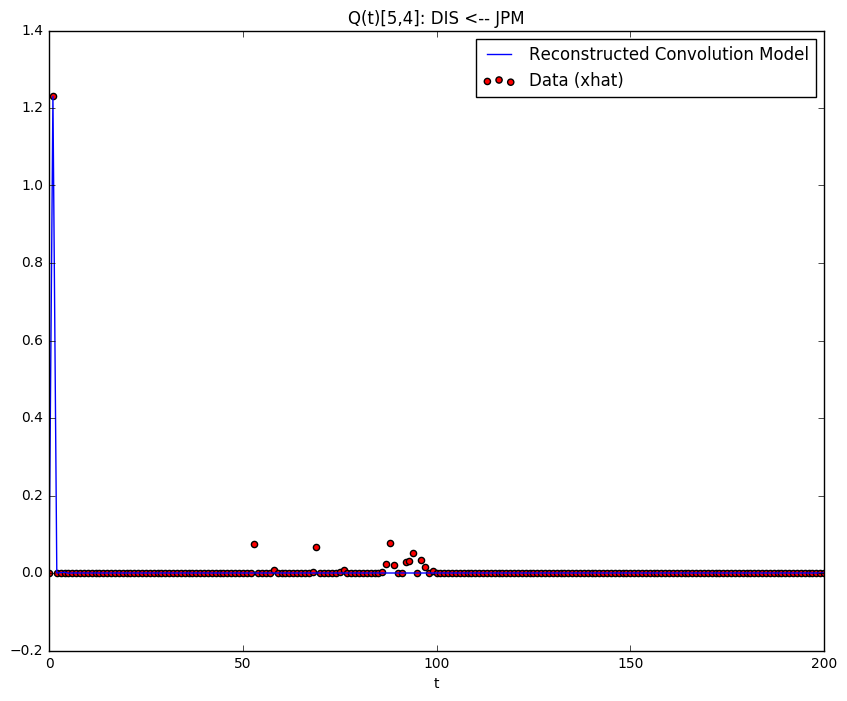

In [8]:
%matplotlib inline
y = pd.read_csv('short.csv')
y = y.sort_values(by='Date')
y = y.tail(R * 6 + 1)
print(y.columns)
cols = [col for col in y.columns if col != 'Date']
cols = ['XOM', 'CVX', 'C', 'JPM', 'DIS']
y = y[cols].values
securities = cols

titles = {i + 1: sec for i, sec in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=True)
rs = recon.unmeasured(y, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [9]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([2.17623962404 -0.0682803241696 -0.530522800845 0.180623613146 -5.82455314454 -0.0682897681068 5.65610486265 0.0779813384222 ; 0.785659768077 0.0250687556571 1.09869406009 0.043159615723 0.0943247598786 0.0128021803054 -1.69837518029 0.0402192451759 ; 0.414660817706 -0.00214085533375 2.26340400396 -0.0150557032667 -3.39026609155 -0.019693501786 1.2645110742 -0.025149124221 ; -1.39458590736 -0.0136033332971 -0.615389277955 -0.00762207239325 1.87546858309 0.00863632848301 0.0625318747098 -0.0494202429267 ; 8.95455304287 0.0447512604628 1.59409199971 0.0664843925918 -3.24708814954 -0.0577527541208 -4.75175761221 -0.0543868554416 ; -2.14481346255 -0.0127789070851 -2.44173174641 -0.0418285106494 -0.0203290690949 0.146848663814 1.04934217953 0.0687686093035 ; -0.345992693871 0.00540951503885 -0.12548267189 0.016925565055 -0.635501804041 0.00485347294359 1.1987451627 0.00590628023792 ; 0.633453244154 0.0302249925792 -0.848769974752 0.0339329700804 -0.332998868099 -0.0148828459

In [10]:
y = pd.read_csv('short.csv')
y = y.sort_values(by='Date')
y = y.tail(R * 6 + 1)
print(len(y))

1201
